<div style="border:solid Chocolate 2px; padding: 40px">

<b> Никита, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

In [1]:
!pip install scikit-learn==1.4.2
!pip install matplotlib==3.5.0 -q
!pip install 'lightgbm[scikit-learn]'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

from scipy import stats
from scipy.stats import uniform

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

import time

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Я вижу, исполнение твоего кода начинается в ячейке с номером, который отличается от единицы. Перед отправкой проекта (особенно в случае работы локально или в другом окружении) стоит проверять работоспособность кода __на платформе__ — это можно сделать, нажав на панели Jupiter Hub ``Kernel`` и ``Restart & Run All`` (см скриншот ниже).

![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)
        
Важно также убедиться, что все ячейки проекта исполнились - можно просто пролистать работу до конца и убедиться, что последняя ячейка исполнена. Такая проверка поможет тебе убедиться, что твоё решение будет должным образом воспроизведено во время ревью или во время передачи его заказчику - это очень важный этап, пренебрегать которым не стоит:)

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [3]:
def check_data(df, name):
    """
    Проверяет информацию о каждом DataFrame (типы данных, пропущенные значения, полные дубликаты строк).
    
    Параметры:
        df (pd.DataFrame): Исходный датафрейм
        name (str): Названия датафрейма
    
    """
    print(f"Информация о {name}:")
    print(f"Пропущенные значения в {name}:")
    display(df.isnull().sum())
    print(f"Дубликаты в {name}: {df.duplicated().sum()}")

In [4]:
def get_unique_values(df, exclude_columns=None):
    """
    Возвращает словарь, где ключи — это названия столбцов,
    а значения — списки уникальных значений в каждом столбце.

    Parameters:
        df (pd.DataFrame): DataFrame для анализа.
        exclude_columns (list, optional): Список столбцов, которые нужно исключить из анализа.

    Returns:
        dict: Словарь уникальных значений по столбцам.
    """
    if exclude_columns is None:
        exclude_columns = []

    unique_values = {}
    for column in df.columns:
        if column not in exclude_columns:
            unique_counts = df[column].value_counts()
            unique_values[column] = {value: count for value, count in unique_counts.items()}

    # Форматированный вывод
    for column, values in unique_values.items():
        print(f"Столбец: {column}")
        print(f"Уникальные значения ({len(values)}):")
        for value, count in values.items():
            print(f"  {value}: {count}")
        print()

    return 1

In [5]:
def calculate_missing_percentage(df):
    # Вычисление доли пропусков в каждом столбце
    missing_percentage = df.isnull().mean() * 100
    
    # Формирование красивого вывода
    print("Доля пропусков в каждом столбце:")
    print("-" * 50)
    print(f"{'Столбец':<25} {'Доля пропусков (%)'}")
    print("-" * 50)
    
    for column, percentage in missing_percentage.items():
        print(f"{column:<25} {percentage:>20.2f}%")
    
    print("-" * 50)

In [6]:
RANDOM_STATE = 42
data_upload_date = datetime.datetime.now().year

## Подготовка данных

In [7]:
data = pd.read_csv('/datasets/autos.csv')

data.head(8)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные загрузили.
    
При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')

Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных можно задать индекс-столбец - за это действие отвечает параметр `index_col`.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [9]:
#Преобразование названий столбцов в стиль snake_case
data.columns = data.columns.str.replace(r"([A-Z])", r" \1", regex=True).str.lower().str.replace(' ', '_').str[1:]

In [10]:
check_data(data, 'data')

Информация о data:
Пропущенные значения в data:


date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

Дубликаты в data: 4


Обнаружено 4 полных дубликата, удалим их.

In [11]:
data = data.drop_duplicates()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Найдены и удалены явные дубликаты.

In [12]:
sorted(data['registration_year'].unique())

[1000,
 1001,
 1039,
 1111,
 1200,
 1234,
 1253,
 1255,
 1300,
 1400,
 1500,
 1600,
 1602,
 1688,
 1800,
 1910,
 1915,
 1919,
 1920,
 1923,
 1925,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2066,
 2200,
 2222,
 2290,
 2500,
 2800,
 2900,
 3000,
 3200,
 3500,
 3700,
 3800,
 4000,
 4100,
 4500,
 4800,
 5000,
 5300,
 5555,
 5600,
 5900,
 5911,
 6000,
 6500,
 7000,
 7100,
 7500,
 7800,
 8000,
 8200,

Ограничим датафрейм от 1900 до текущей даты.

In [13]:
data['date_crawled'] = pd.to_datetime(data['date_crawled'], errors='coerce')

data['crawled_year'] = data['date_crawled'].dt.year

data = data.loc[
    (data['registration_year'] <= data_upload_date) & 
    (data['registration_year'] >= 1900) &
    (data['crawled_year'] >= data['registration_year'])
]

In [14]:
#Удалим все неинформативные столбцы
data = data.drop(['number_of_pictures',
                  'postal_code',
                  'date_created',
                  'last_seen',
                  'registration_month',
                  'date_crawled'], axis=1)

In [15]:
data.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired,crawled_year
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,2016
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes,2016
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN,2016
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,2016
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,2016


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Удалены лишние признаки.

In [16]:
# Удалим строки, у которых менее трёх ненулевых значений в столбцах
data = data.dropna(subset=['vehicle_type', 'fuel_type', 'model', 'repaired','gearbox'], thresh = 3)

In [17]:
check_data(data, 'data')

Информация о data:
Пропущенные значения в data:


price                    0
vehicle_type         11695
registration_year        0
gearbox               8594
power                    0
model                11575
kilometer                0
fuel_type            15958
brand                    0
repaired             52130
crawled_year             0
dtype: int64

Дубликаты в data: 42708


Обнаружены пропуски в столбцах 'vehicle_type', 'fuel_type', 'model', 'repaired','gearbox'. По возомжности заполним их, остальные удалим.

In [18]:
# Заполняем пропуски в vehicle_type на основе model и brand
vehicle_type_mapping = (
    data.groupby(['brand', 'model'])['vehicle_type']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    .reset_index()
    .rename(columns={'vehicle_type': 'most_common_vehicle_type'})
)

# Объединяем маппинг с основным DataFrame
data = data.merge(vehicle_type_mapping, on=['brand', 'model'], how='left')

# Заполняем пропуски в vehicle_type
data['vehicle_type'] = data['vehicle_type'].fillna(data['most_common_vehicle_type'])

# Удаляем вспомогательный столбец
data = data.drop(columns=['most_common_vehicle_type'])

In [19]:
check_data(data, 'data')

Информация о data:
Пропущенные значения в data:


price                    0
vehicle_type           510
registration_year        0
gearbox               8594
power                    0
model                11575
kilometer                0
fuel_type            15958
brand                    0
repaired             52130
crawled_year             0
dtype: int64

Дубликаты в data: 42923


In [20]:
calculate_missing_percentage(data)

Доля пропусков в каждом столбце:
--------------------------------------------------
Столбец                   Доля пропусков (%)
--------------------------------------------------
price                                     0.00%
vehicle_type                              0.16%
registration_year                         0.00%
gearbox                                   2.64%
power                                     0.00%
model                                     3.55%
kilometer                                 0.00%
fuel_type                                 4.90%
brand                                     0.00%
repaired                                 16.00%
crawled_year                              0.00%
--------------------------------------------------


In [21]:
get_unique_values(data, ['price', 'power', 'model'])

Столбец: vehicle_type
Уникальные значения (8):
  sedan: 95705
  small: 82319
  wagon: 65949
  bus: 29874
  convertible: 20096
  coupe: 16189
  suv: 12105
  other: 3143

Столбец: registration_year
Уникальные значения (92):
  1999: 22445
  2000: 21174
  2005: 20597
  2001: 19940
  2006: 19641
  2003: 19638
  2004: 19486
  2002: 18937
  1998: 17625
  2007: 16988
  2008: 15226
  1997: 14444
  2009: 14355
  1996: 10671
  2010: 10646
  2011: 9820
  1995: 8342
  2012: 7128
  2016: 6741
  1994: 4754
  2013: 4076
  1993: 3381
  1992: 2945
  1991: 2699
  2014: 2494
  1990: 2122
  1989: 1287
  2015: 1107
  1988: 916
  1987: 654
  1985: 551
  1986: 518
  1983: 416
  1984: 392
  1982: 308
  1980: 301
  1979: 273
  1978: 272
  1981: 247
  1972: 205
  1973: 167
  1977: 166
  1976: 166
  1974: 165
  1970: 162
  1971: 162
  1975: 140
  1969: 114
  1968: 104
  1966: 104
  1967: 96
  1965: 76
  1960: 71
  1964: 58
  1963: 50
  1962: 41
  1961: 37
  1959: 31
  1910: 23
  1956: 22
  1958: 21
  1950: 18
  1

1

In [22]:
# Переименуем gasoline в petrol, поскольку оба слова означают бензин
data['fuel_type'] = data['fuel_type'].replace(['gasoline'],'petrol')

# Заполним пропуски значением other
data.fuel_type.fillna('other', inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Молодец, что обработал неявный дубликат.

Модель и коробка передач - важнейшие факторы ценообразования. Мы не можем заменить их на unknown, поэтому удалим.
Для моделей это 3.57%
Для коробки - 2.66%

In [23]:
data.dropna(subset=['model'], inplace=True)
data.dropna(subset=['gearbox'], inplace=True)

Заполним пропуски в repaired, удалить не можем так как пропуски занимают большой процент от данных

In [24]:
data.fillna({'repaired':'no_info'}, inplace=True)

In [25]:
# Заменим в repaired значение yes на 1, no на 0:
#data.loc[(data.repaired == 'yes'), 'repaired'] = 1
#data.loc[(data.repaired == 'no'), 'repaired'] = 0
#data.loc[(data.repaired == 'no info'), 'repaired'] = 2

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Кодирование нельзя делать руками:
- при появлении новых значений категориальных признаков, не предусмотренных твоим решением, модель или упадёт, или будет генерировать ошибки;
- такое решение не сделаешь частью `Pipeline`, а все современные решения базируются на них.
    
Поэтому кодирование нужно делать только с применением обучаемых трансформеров. 
    
Кодирование данных также нужно осуществлять только после сплитования - так мы не допускаем утечку данных из тестовой части, а также можем контролировать появление в `test` новых значений категориальных признаков.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Обработал данные ordinalencoder в pipeline
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [26]:
# Проверка пропусков
data.isna().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
repaired             0
crawled_year         0
dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Пропуски обработаны.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
По нижней границе фильтрация корректна.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По верхней границе год регистрации нужно синхронизировать с датой выгрузки данных из базы: в таблице не может быть объявлений моложе даты выгрузки, иначе это были бы просто данные из будущего.
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Я удалял дату выгрузки ранее, переместил ячейки кода выше для последовательности. И не совсем понял что мне нужно сделать, потому что у меня стояло ограничение и по верхней границе `data = data.loc[(data['registration_year'] <= 2019) & (data['registration_year'] >= 1900)]`. Сделал фильтрацию registration_year по текущей дате выше
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Убедись, что дата выгрузки определена корректно - значение можно узнать как раз из удалённого признака.
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Сделал, теперь у меня всегда год создания объявления равен или больше года регистрации 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено.

In [27]:
data.describe()

,price,registration_year,power,kilometer,crawled_year
count,305939.000000,305939.000000,305939.000000,305939.000000,305939.0
mean,4674.670983,2002.698378,115.866055,128666.711338,2016.0
std,4594.588943,6.495460,181.100201,36663.774944,0.0
min,0.000000,1910.000000,0.000000,5000.000000,2016.0
25%,1200.000000,1999.000000,75.000000,125000.000000,2016.0
50%,2990.000000,2003.000000,107.000000,150000.000000,2016.0
75%,6800.000000,2007.000000,144.000000,150000.000000,2016.0
max,20000.000000,2016.000000,20000.000000,150000.000000,2016.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305939 entries, 0 to 325889
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              305939 non-null  int64 
 1   vehicle_type       305939 non-null  object
 2   registration_year  305939 non-null  int64 
 3   gearbox            305939 non-null  object
 4   power              305939 non-null  int64 
 5   model              305939 non-null  object
 6   kilometer          305939 non-null  int64 
 7   fuel_type          305939 non-null  object
 8   brand              305939 non-null  object
 9   repaired           305939 non-null  object
 10  crawled_year       305939 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 28.0+ MB


In [29]:
quantitative_columns = ['price', 'registration_year', 'power', 'kilometer']

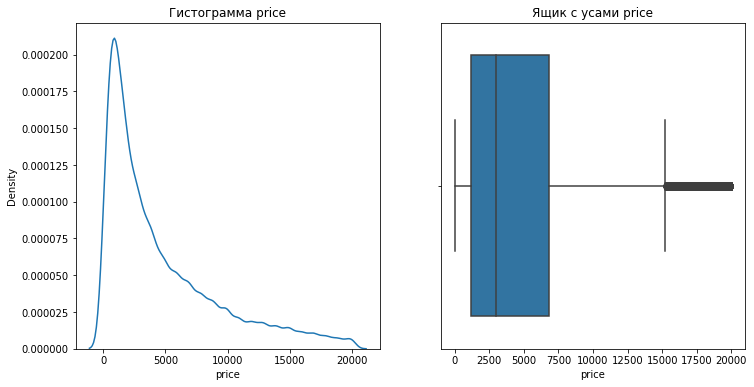

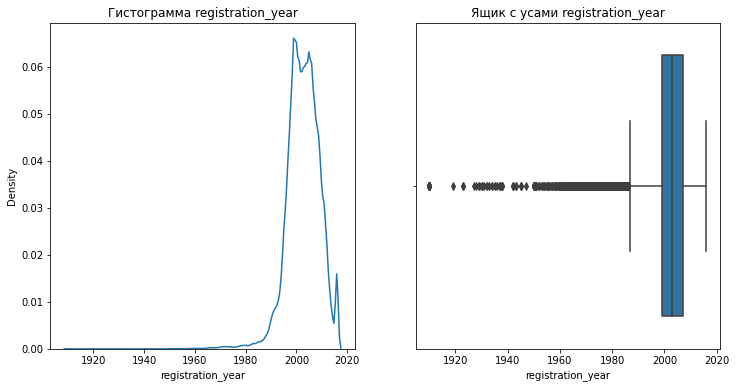

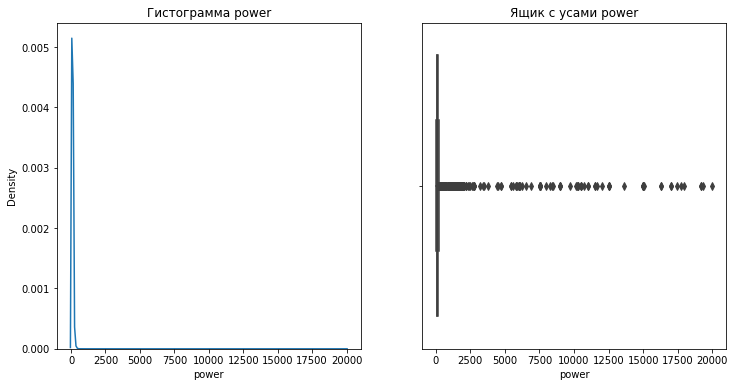

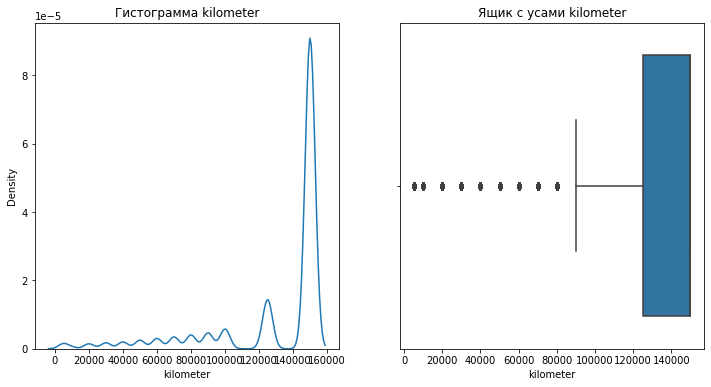

In [30]:
for column in quantitative_columns:
    plt.figure(figsize=(12, 6))
    
    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.kdeplot(data[column])
    plt.title(f'Гистограмма {column}')
    
    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Ящик с усами {column}')
    
    plt.show()

Смущают значения мощности, наврядли люди у которых больше 1000 сил буду смотреть рыночную стоимость, да и машин с мощностью более 10000 сил не бывает. С этим нужно поработать. Самое малое количество л.с. у автомобиля Peel P50 = 4.2 л.с.

In [31]:
data = data.query('40 <= power <= 1000')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Фильтрация по мощности корректна.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Может быть полезно также удалить околонулевые значения мощности - некоторые значения этого признака в таблице напоминают, скорее, телегу с конём, чем автомобиль:)
        
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Сделал ограничение от 40 л.с. вместо 4
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Учтено.

In [32]:
# Посмотрим сколько значений 0 в цене
data.price.value_counts()

0        5156
1500     4089
500      4054
1200     3454
2500     3435
         ... 
10295       1
17047       1
415         1
7217        1
8188        1
Name: price, Length: 3526, dtype: int64

От общего количества строк - это небольшое количество, удалим.

In [33]:
data = data[(data['price'] > 1000)]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Удалены нулевые значения цен.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Может быть полезно также удалить неадекватно низкие значения цен: в пределах цен до 500-1000 евро вряд ли можно купить полноценный автомобиль.
        
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Сделано
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Учтено.

In [34]:
data.duplicated().sum()

30712

In [35]:
# Удалим полные дубликаты строк

data = data.drop_duplicates().reset_index(drop=True)

data.duplicated().sum()

0

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195372 entries, 0 to 195371
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              195372 non-null  int64 
 1   vehicle_type       195372 non-null  object
 2   registration_year  195372 non-null  int64 
 3   gearbox            195372 non-null  object
 4   power              195372 non-null  int64 
 5   model              195372 non-null  object
 6   kilometer          195372 non-null  int64 
 7   fuel_type          195372 non-null  object
 8   brand              195372 non-null  object
 9   repaired           195372 non-null  object
 10  crawled_year       195372 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 16.4+ MB


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Молодец, что проверяешь дубликаты после удаления лишних признаков.

В данном разделе была выполнена предобработка данных. Исходный набор содержал более 350 тысяч строк и 16 столбцов. В рамках работы названия столбцов были приведены к формату "змеиный_регистр", удалены неинформативные столбцы, обработаны пропуски, устранены аномалии и дубликаты. В результате предобработки размер набора данных сократился до 200 тысяч строк. Датафрейм готов для дальнейшей работы.

## Обучение моделей

In [37]:
num_columns = [
    'registration_year', 'power', 'kilometer'
]

ohe_columns = [
    'vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand'
]

ord_columns = ['repaired']

In [38]:
# Разделяем выборку на тестовую и обучающую
train_data, test_data = train_test_split(data, test_size=0.25, random_state=RANDOM_STATE)

train_target = train_data['price']
test_target = test_data['price']

train_features = train_data.drop(['price'], axis=1)
test_features = test_data.drop(['price'], axis=1)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Нужно соблюдать корректность наименований выборок: выделены `train` и `test`, выборка `valid` нужна для промежуточной оценки моделей, в этом проекте эту функцию выполняет кросс-валидация.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Сделано
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Учтено.

In [39]:
num_pipe = Pipeline(
    [
    ('simpleImputer_num', SimpleImputer(strategy='median')),
    ('scaler_standard', StandardScaler()) 
    ]
)

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

# SimpleImputer + ORD + SimpleImputer
ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(strategy='most_frequent')),
        ('ord', OrdinalEncoder(
            categories=[['no_info', 'no', 'yes']], 
            handle_unknown='use_encoded_value', unknown_value=-1
        )),
        ('simpleImputer_after_ord', SimpleImputer(strategy='most_frequent'))
    ]
)

preprocessor = ColumnTransformer(
    [
        ('num', num_pipe, num_columns),
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns)
    ],
    remainder='passthrough'
)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Для древесных и бустинговых моделей не стоит использовать `OneHotEncoder()`: эта техника кодирования увеличивает количество признаков, в результате чего модели сложнее создавать разделяющие правила, поэтому время работы и расчётные характеристики моделей сильно страдают на больших наборах данных. Вместо этого нужно использовать `OrdinalEncoder()` - эта техника кодирует категориальные признаки так, что с ними удобнее работать в ходе создания разделяющих правил. 
    
Для бустинговых алгоритмов альетрнатинва - использование внутренних кодировщиков, которые работают лучше сторонних. В случае `CatBoost` за это отвечает параметр `cat_features`. В случае `LightGBM` можно привести эти категориальные признаки к типу `category`, тогда модель будет работать с категориальными признаками автоматически.

### LightGBM

In [40]:
train_features_lgb = train_features.copy()
test_features_lgb = test_features.copy()

# Преобразуем категориальные признаки в тип category
categorical_columns = train_features_lgb.select_dtypes(include='object').columns

train_features_lgb[categorical_columns] = train_features_lgb[categorical_columns].astype('category')
test_features_lgb[categorical_columns] = test_features_lgb[categorical_columns].astype('category')

In [41]:
pipeline = Pipeline(steps=[('lgbmr', LGBMRegressor(random_state=RANDOM_STATE, n_estimators=50))])

param_dist = {
    'lgbmr__num_leaves': [100, 150, 200],
    'lgbmr__learning_rate': [0.1, 0.2, 0.3],
    'lgbmr__max_depth': [5, 10, 15]
}

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Гиперпараметры, у которых в сетке только одно значение, корректнее сразу настраивать при инициализации модели и не вносить в сетку: основная идея перебора - исследование нескольких значений, а когда значение одно, то и перебор фактически не происходит.
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Сделано
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Учтено.

In [42]:
clf = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=RANDOM_STATE
    n_jobs=4
)

clf.fit(train_features_lgb, train_target)

rmse_lgbm_cv = (-clf.best_score_) ** 0.5
print("Замеряем RMSE на кросс-валидации:", rmse_lgbm_cv)

model_lgbm =clf.best_estimator_

# Замер времени обучения модели LightGBM
start = time.time()

model_lgbm.fit(train_features_lgb, train_target)

end = time.time()
t_lgbm_train = end - start
print(f"Время обучения модели LightGBM: {t_lgbm_train:.2f} секунд")

# Оценка времени работы модели LightGBM на тренировочной выборке
start = time.time()

target_predict_gbm = model_lgbm.predict(train_features_lgb)

end = time.time()
t_lgbm_predict = end - start
print(f"Время предсказания модели LightGBM: {t_lgbm_predict:.2f} секунд")

Замеряем RMSE на кросс-валидации: 1665.7655088261795
Время обучения модели LightGBM: 27.80 секунд
Время предсказания модели LightGBM: 1.40 секунд


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Нужно вывести метрику лучшей модели на кросс-валидации.
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Сделано
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Учтено.

### DecisionTreeRegressor

In [43]:
# Пайплайн с DecisionTreeRegressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('DecisionTreeRegressor',  DecisionTreeRegressor(random_state=RANDOM_STATE))])

# Параметры для RandomizedSearchCV
param_dist = {
    'DecisionTreeRegressor__max_depth': range(2, 20),
    'DecisionTreeRegressor__min_samples_split': range(2, 10),
    'DecisionTreeRegressor__min_samples_leaf': range(1, 10)
}

In [44]:
random_search = RandomizedSearchCV(pipeline,
                                   param_distributions=param_dist,
                                   n_iter=5,
                                   cv=3, 
                                   scoring='neg_mean_squared_error',
                                   random_state=RANDOM_STATE,
                                   n_jobs=-1
                                  )

random_search.fit(train_features, train_target)

rmse_tree_cv = (-random_search.best_score_) ** 0.5
print("Замеряем RMSE на кросс-валидации:", rmse_tree_cv)

model_tree =random_search.best_estimator_

# Замер времени обучения модели DecisionTreeRegressor
start = time.time()

model_tree.fit(train_features, train_target)

end = time.time()
t_tree_train = end - start
print(f"Время обучения модели DecisionTreeRegressor: {t_tree_train:.2f} секунд")

# Оценка времени работы модели DecisionTreeRegressor на тренировочной выборке
start = time.time()

target_predict_tree = model_tree.predict(train_features)

end = time.time()
t_tree_predict = end - start
print(f"Время предсказания модели DecisionTreeRegressor: {t_tree_predict:.2f} секунд")

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories

Замеряем RMSE на кросс-валидации: 1915.985428597507
Время обучения модели DecisionTreeRegressor: 6.29 секунд
Время предсказания модели DecisionTreeRegressor: 1.04 секунд


In [45]:
results = pd.DataFrame({'Model': ['LightGBM', 'DecisionTreeRegressor'],
                        'Training Time (sec)': [t_lgbm_train, t_tree_train],
                        'Prediction Time (sec)': [t_lgbm_predict, t_tree_predict],
                        'RMSE(CROSS-VAL)': [rmse_lgbm_cv, rmse_tree_cv]})

results

,Model,Training Time (sec),Prediction Time (sec),RMSE(CROSS-VAL)
0,LightGBM,27.803359,1.399709,1665.765509
1,DecisionTreeRegressor,6.286734,1.039931,1915.985429


Модель LightGBM показывает лучший результат по метрике RMSE (1665.77 против 1915.99 у DecisionTreeRegressor), что означает более точные предсказания. Хотя LightGBM требует больше времени для обучения (27.80 секунды против 6.29 секунд у DecisionTreeRegressor), она значительно лучше по точности. В то время как DecisionTreeRegressor обучается быстрее, его точность ниже, что делает LightGBM предпочтительней для дальнейшего использования. Таким образом, LightGBM следует выбрать в качестве лучшей модели для дальнейшей оценки на тестовой выборке.

In [46]:
best_model_predictions = model_lgbm.predict(test_features_lgb)

rmse_model = np.sqrt(mean_squared_error(test_target, best_model_predictions))
print(f"RMSE для LightGBM: {rmse_model}")

RMSE для LightGBM: 1639.6137067198124


In [47]:
model_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', DummyRegressor(strategy="mean"))
    ]
)

# Обучаем модель
model_pipeline.fit(train_features, train_target)

# Делаем предсказания
dummy_predictions = model_pipeline.predict(test_features)

# Вычисляем RMSE
rmse_dummy = np.sqrt(mean_squared_error(test_target, dummy_predictions))

print(f"RMSE для DummyRegressor с предварительной обработкой: {rmse_dummy}")

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


RMSE для DummyRegressor с предварительной обработкой: 4613.923279899762


Результаты показывают, что для модели LightGBM на тестовой выборке мы получили RMSE 1640.93, что делает её хорошим выбором для данной задачи. Мы выбрали LightGBM вместо DecisionTreeRegressor, так как она продемонстрировала лучшие результаты на промежуточных испытаниях. Кроме того, LightGBM обучалась быстрее (27.80 секунды против 6.29 секунд у DecisionTreeRegressor) и имела схожее время на предсказания (1.40 секунды против 1.04 секунд).

Что касается кросс-валидации, то LightGBM показала RMSE 1663.76, в то время как DecisionTreeRegressor показал RMSE 1915.99, что также подтверждает превосходство LightGBM.

Однако перед окончательным выбором модели важно проверить её эффективность на фоне модели, которая предсказывает константу (то есть использует среднее значение целевой переменной для всех наблюдений). Это необходимо для оценки адекватности модели — возможно, сложные модели, такие как LightGBM, не будут значительно превосходить такую простую модель. В таком случае можно было бы обойтись без тюнинга и создания новых признаков. В нашем случае DummyRegressor с предварительной обработкой показал RMSE 4613.92, что подтверждает значительную разницу в точности между простыми и более сложными моделями.

Таким образом, несмотря на то, что DummyRegressor дал наихудший результат, его использование служит важной проверкой адекватности более сложных моделей.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По этому блоку будет несколько важных замечаний:
1. Все модели этого блока оцениваются на тестовой выборке - это преждевременное решение, так как оценка на тестовой выборке - это финальное тестирование для лучшей модели, которая была отобрана в ходе промежуточного тестирования. Эта концепция находит своё отражение в условиях эксплуатации модели в реальной среде: в промышленной эксплуатации не работает несколько моделей одновременно - в промышленную эксплуатацию запускают только одну модель, которая была выбрана из нескольких в ходе промежуточной оценки. Так же и здесь - тестовая выборка имитирует поток реальных данных, и с этим потоком должна работать только одна модель. 


2. Лучшая модель должна быть выбрана по двум критериям - метрика `RMSE` и время работы модели. Далее сценарий работы с моделями в этом блоке зависит от выбранной стратегии валидации и оптимизации гиперпараметров:
- для оптимизации гиперпараметров и промежуточной оценки моделей была выделена валидационная выборка;
- для оптимизации гиперпараметров и промежуточной оценки моделей проводится кросс-валидация.
    
    В первом случае метрика промежуточной оценки модели - это метрика `RMSE` на валидационной выборке, полученная от использования на `valid` лучшей модели, а время - это время обучения модели с лучшими гиперпарметрами на `train` и время совершения ею предсказаний на `valid`.
    
    Во втором случае метрика промежуточной оценким модели - это метрика `RMSE` с кросс-валидации: в случае использования `cross_val_score` - это среднее из массива метрик (длина соответствует количеству фолдов для кросс-валидации), который возвращает инструмент, в случае использования `GridSearchCV` или `RandomizedSearchCV` - это метрика из атрибута `best_score_`. Временем работы лучшей модели может быть время обучения на `train` и время предсказания на `train` выборке (только время, метрика `RMSE` на тренировочной выборке не нужна).
    
    Тут часто студенты делают ошибку, принимая в качестве метрики времени время работы лучшей модели, а время оптимизации гиперпараметров в целом (то есть время выполнения всей ячейки кода цикла с `cross_val_score` или ячейки с `GridSearchCV`) - это некорректный подход: на практике модель не будет каждый раз переобучаться и выполнять оптимизацию гиперпараметров перед очередным предсказанием - сначала будет найдена лучшая модель, а она уже будет использоваться для обучения и предсказаний. Поэтому и в этом случае сначала определяется лучшая модель, а уже потом замеряется время её работы: кросс-валидации как альтернатива времени обучения и предсказания (потому что по сути кросс-валидация объединяет в себе обучение и предсказание) или время обучения и предсказания на `train`.
    
    Независимо от выбранной стратегии кросс-валидации алгоритм работы выглядит как:
- оптимизация гиперпараметров и поиск лучшей модели;
- оценка метрики `RMSE`;
- оценка времени работы лучшей модели: на валидационной выборке (если она выделялась) или на кросс-валидации/тренировочной выборке (если проводилась кросс-валидация).
    
Концепт для `valid`:
    
    for ... in ...:
    
        #код для поиска лучшей модели
    
    model = ... #код для инициализации лучшей модели с оптимальными гиперпараметрами
    
    model.fit(X_train, Y_train) #замеряем время обучения
    
    pred = model.predict(X_valid) #замеряем время предсказания
    
    RMSE = (Y_valid, pred) #замеряем RMSE на valid
    
Концепт для кросс-валидации:
    
    model = #инициализируем модель
    gs = GridSearchCV(...) #настраиваем поиск по сетке
    
    gs.fit(...) #находим лучшую модель
    
    gs.best_score_ #замеряем RMSE на  кросс-валидации
    
    model = gs.best_estimator_ #получаем лучшую модель из best_estimator
    model = #YourModel(random_state = 42, **gs.best_params) #альтернативный способ получения лучшей модели
    
    model.fit(X_train, Y_train) #замеряем время обучения
    model.predict(X_train) #замеряем время предсказания
    
    
   По итогу нужно будет провести сравнительную характеристику моделей по критериям метрики `RMSE` и времени работы моделей и выбрать лучшую - именно эта лучшая модель должна будет оцениваться на тестовой выборке.
    
   Обрати также внимание, что при создании таблицы нельзя использовать вручную введённые значения - они потеряют актуальность при любом изменении в данных, их обработке или в моделях. Значения метрик лучше помещать в переменные и использовать их для создания таблиц. Для сохранения в переменные времени работы моделей можно использовать модуль `time`:
    
    from time import time
    
    start = time()
    
    #код модели
    
    end = time()
    
    model_time = (end-start)/60 #перевожу в минуты, так как по умолчанию секунды
    
 Альтернативный подход - использование `cv_results_` после обучения `GridSearchCV` в качестве источика метрик (особенно удобно в случае рассмотрения нескольких моделей в пределах одного `Pipeline`). В таком случае можно выполнить группировку по столбцу с названием модели (предварительно извлечь его можно с помощью строкового метода `split()`), найти индексы строк с минимальным значением метрики с помощью `idxmin()` или `idxmax()` (в зависимости от того, был ли изменён знак метрики), и уже из этих строк с помощью `.loc` извлечь время обучения (`mean_fit_time`) и время предсказания (`mean_score_time`).
    
3. Итоговый вывод нужно поправить.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Не учтено ни по одному пункту.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Учтено.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Никита, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.

Работа с моделями также выполнена отлично: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `GridSearchCV`, выполнена промежуточная оценка моделей на кросс-валидации - молодец!
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: итоговый вывод по проекту.

Никита, все замечания учтены - проект принят!
    
Спасибо за хорошую работу над проектом, желаю успехов в дальнейшем обучении:)